**Some Useful Modules**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax;
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
%matplotlib inline
import scipy.special 
import random
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

**Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mnist_train = pd.read_csv("/content/drive/MyDrive/mnist_train.csv", header= None)
mnist_test = pd.read_csv("/content/drive/MyDrive/mnist_test.csv", header= None)

In [ ]:
print(mnist_train.shape)
mnist_train.head()

(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train data has 60000 samples, each sample has 784 pixel values and one output label

In [ ]:
print(mnist_test.shape)
mnist_test.head()

(10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Test data has 10000 samples, each sample has 784 pixel values and one output label

In [ ]:
# split data as X_train, y_train, X_test and y_test for training and testing
X_train , y_train = mnist_train.iloc[:, 1:] , mnist_train.iloc[:, 0]
X_test , y_test = mnist_test.iloc[:, 1:] , mnist_test.iloc[:, 0]

In [ ]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Analyse the pixels intensity values
X_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
#NaN values in the dataset ?
empty = mnist_train.isnull().sum()
print(empty[empty != 0])

Series([], dtype: int64)


Therefore, there is no missing value.

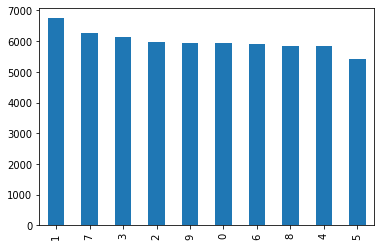

In [ ]:
# Number of samples for each number for train set
y_train.value_counts().plot(kind='bar')
plt.show()

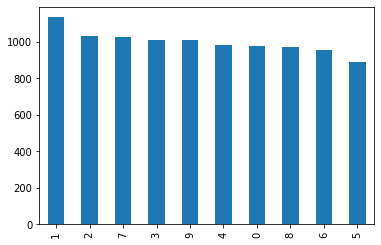

In [ ]:
# Number of samples for each number for test set
y_test.value_counts().plot(kind='bar')
plt.show()

Since the numbers are balanced, there is no need to make any changes to any train and test datasets.

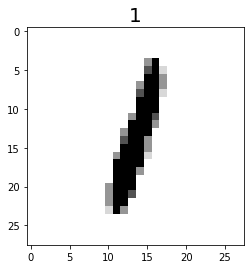

In [ ]:

#Displays handwritten digit images
index = random.randint(0, 60000)
image_array = np.asfarray(X_train.iloc[[index]]).reshape((28,28)) 
plt.title(int(y_train[index]), fontsize = 20)
plt.imshow(image_array, cmap='Greys',  interpolation='None')

**Normalization for X_train and X_test**

In [ ]:
scaled_X_train = (np.asfarray(X_train) / 255.0 * 0.99) + 0.01
scaled_X_test = (np.asfarray(X_test) / 255.0 * 0.99) + 0.01

161


In [ ]:
# One example for non scaled train data
X_train.loc[602].head(-150)

1        0
2        0
3        0
4        0
5        0
      ... 
630    253
631    253
632    253
633    236
634    175
Name: 602, Length: 634, dtype: int64

In [ ]:
#Same example for scaled train data
pd.Series(scaled_X_test[601]).head(-150)

0      0.010000
1      0.010000
2      0.010000
3      0.010000
4      0.010000
         ...   
629    0.945647
630    0.118706
631    0.010000
632    0.010000
633    0.010000
Length: 634, dtype: float64

**One-hot encoding for test and train output**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# Define the One-hot Encoder
ohe = preprocessing.OneHotEncoder()

# Reshape data
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Fit and transform training data
ohe.fit(y_train)
transformed_y_train = ohe.transform(y_train).toarray()

# Fit and transform testing data
ohe.fit(y_test)
transformed_y_test = ohe.transform(y_test).toarray()

# Print results
print(f'Value without encoding: {y_test[0]}')
print(f'Value with encoding: {transformed_y_test[0]}')

# Convert 0 -> 0.01 and 1 -> 0.99
transformed_y_test[transformed_y_test==0] = 0.01
transformed_y_test[transformed_y_test==1] = 0.99
transformed_y_train[transformed_y_train==0] = 0.01
transformed_y_train[transformed_y_train==1] = 0.99

# Print results
print(f'Value without encoding: {y_test[0]}')
print(f'Value with encoding: {transformed_y_test[0]}')

Value without encoding: [7]
Value with encoding: [0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
Value without encoding: [7]
Value with encoding: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


In [ ]:
print(transformed_y_test.shape)
print(transformed_y_train.shape)

(10000, 10)
(60000, 10)


In [ ]:
# neural network class definition 
class neuralNetwork: 

  # initialise the neural network 
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate): 
    # set number of nodes in each input, hidden, output layer 
    self.inodes = inputnodes 
    self.hnodes = hiddennodes 
    self.onodes = outputnodes 
 
    # link weight matrices, wih and who 
    # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer 
    # w11 w21 
    # w12 w22 etc 
    self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes)) 
    self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes) )

    # learning rate
    self.lr = learningrate
 
    # activation function is the sigmoid function 
    self.activation_function = lambda x: scipy.special.expit(x) 
    pass

  
  # train the neural network 
  def train(self, inputs_array, targets_array): 
    # convert inputs list to 2d array 
    inputs = np.transpose(inputs_array).reshape(-1,1)
    targets = np.transpose(targets_array).reshape(-1,1)
 
    # calculate signals into hidden layer 
    hidden_inputs = np.dot(self.wih, inputs) 
    # calculate the signals emerging from hidden layer 
    hidden_outputs = self.activation_function(hidden_inputs) 
 
    # calculate signals into final output layer 
    final_inputs = np.dot(self.who, hidden_outputs) 
    # calculate the signals emerging from final output layer 
    final_outputs = self.activation_function(final_inputs) 
 
    # output layer error is the (target - actual) 
    output_errors = targets - final_outputs 
    # hidden layer error is the output_errors, split by weights, recombined at hidden nodes 
    hidden_errors = np.dot(self.who.T, output_errors) 
 
    # update the weights for the links between the hidden and output layers 
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs)) 
 
    # update the weights for the links between the input and hidden layers 
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs)) 
 
    return np.max(output_errors)
  
  # query the neural network 
  def query(self, inputs_array, targets_array): 
    # convert inputs list to 2d array 
    inputs = np.transpose(inputs_array).reshape(-1,1)
    targets = np.transpose(targets_array).reshape(-1,1)
 
    # calculate signals into hidden layer 
    hidden_inputs = np.dot(self.wih, inputs) 
    
    # calculate the signals emerging from hidden layer 
    hidden_outputs = self.activation_function(hidden_inputs) 

    # calculate signals into final output layer 
    final_inputs = np.dot(self.who, hidden_outputs) 

    # calculate the signals emerging from final output layer 
    final_outputs = self.activation_function(final_inputs) 

    # output layer error is the (target - actual) 
    output_errors = targets - final_outputs 
 
    return final_outputs,np.max(output_errors)

**Performance evaluation function**

In [ ]:
num_of_epochs = []
performance= []

def evaluate_performance(test_data,test_label,num_of_epoch):
  # test the neural network 
  # scorecard for how well the network performs, initially empty 
  scorecard = [] 
  # go through all the records in the test data set 
  for record in range(len(test_data)):
    # query the network 
    outputs, error = n.query(test_data[record],transformed_y_test[record]) 
    # the index of the highest value corresponds to the label 
    label = np.argmax(outputs) 
    # append correct or incorrect to list 
    if (label == np.argmax(test_label[record])): 
      # network's answer matches correct answer, add 1 to scorecard 
      scorecard.append(1) 
    else: 
      # network's answer doesn't match correct answer, add 0 to scorecard 
      scorecard.append(0) 
  # calculate the performance score, # calculate the performance score, the fraction of correct answers
  scorecard_array = np.asarray(scorecard)
  performance.append(scorecard_array.sum() / scorecard_array.size)
  num_of_epochs.append(num_of_epoch)

**Initial hyperparameter values**

In [ ]:
# number of input, hidden and output nodes 
input_nodes = 784 
hidden_nodes = 100 #(1 hidden layer)
output_nodes = 10 

# learning rate 
learning_rate = 0.01

# create instance of neural network 
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

**Parameter Tuning**

The possible values of the parameters were tried and the best parameters were selected according to the performance graph.

**Learning rate optimization**

In [ ]:
epochs= 10
performance=[]
current_epoch=1
learning_rates_list = [0.001,0.01,0.05,0.1,0.3,0.5]
learning_rates_accuracy= []
index_number=0

for i in learning_rates_list:
  n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, i)
  for e in range(epochs):
    # go through all records in the training data set
    for samples in range(60000):
      inputs= scaled_X_train[samples]
      targets= transformed_y_train[samples]
      n.train(inputs, targets)
      pass
    pass
  evaluate_performance(scaled_X_test,transformed_y_test,current_epoch)
  learning_rates_accuracy.append(performance[index_number])
  index_number += 1
  pass

These values recorded for hidden_nodes= 100, num_of_epochs= 10

In [ ]:
pd.DataFrame(learning_rates_accuracy,index=learning_rates_list, columns=["performance"])

,performance
0.001,0.9202
0.010,0.9649
0.050,0.9696
0.100,0.9666
0.300,0.9453
0.500,0.9309


Text(0.5, 1.0, 'Performance for different learning rates')

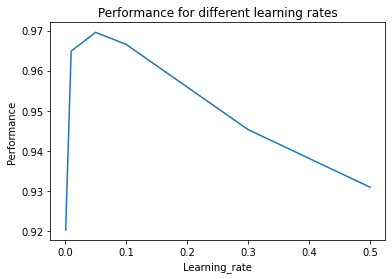

In [ ]:
# Plot performance vs learning rate graph for best learning rate
plt.plot(learning_rates_list, learning_rates_accuracy)

plt.xlabel('Learning_rate')
plt.ylabel("Performance")
plt.title('Performance for different learning rates')

**best parameter for learning rate**= 0.05

**Hidden nodes number optimization**

In [ ]:
epochs= 10
learning_rate = 0.05
performance= []
current_epoch=1
hidden_nodes_list = [2,10,20,40,70,100,150,200,300,400]
hidden_nodes_accuracy= []
index_number=0

for i in hidden_nodes_list:
  n = neuralNetwork(input_nodes,i,output_nodes, learning_rate)
  for e in range(epochs):
    # go through all records in the training data set
    for samples in range(60000):
      inputs= scaled_X_train[samples]
      targets= transformed_y_train[samples]
      n.train(inputs, targets)
      pass
    pass
  evaluate_performance(scaled_X_test,transformed_y_test,current_epoch)
  hidden_nodes_accuracy.append(performance[index_number])
  index_number += 1
  pass

These values recorded for num_of_epochs = 10 and learning_rate=0.05

hidden_nodes_list = [2,10,20,40,70,100,150,200,300,400]

In [ ]:
pd.DataFrame(hidden_nodes_accuracy,index=hidden_nodes_list, columns=["performance"])

,performance
2,0.2924
10,0.9085
20,0.9367
40,0.9574
70,0.9641
100,0.9712
150,0.9736
200,0.9739
300,0.9760
400,0.9781


Text(0.5, 1.0, 'Performance for different number of hidden nodes')

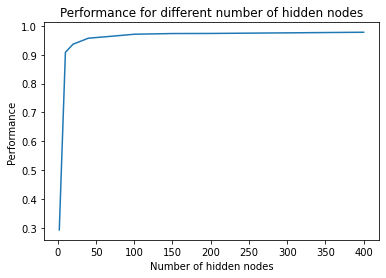

In [ ]:
# Plot performance vs hidden nodes number graph for best hidden nodes number
plt.plot(hidden_nodes_list,hidden_nodes_accuracy)

plt.xlabel('Number of hidden nodes')
plt.ylabel("Performance")
plt.title('Performance for different number of hidden nodes')

**best parameter for hidden nodes**= 150

**Epochs number optimization**

In [ ]:
epochs= 30
hidden_nodes= 150
learning_rate= 0.05
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
predictions= []
performance= []
current_epoch=1
loss= 0
loss_list= []

for e in range(epochs):
  # go through all records in the training data set
  for samples in range(60000):
    inputs= scaled_X_train[samples]
    targets= transformed_y_train[samples]
    loss += n.train(inputs, targets)
    pass
  loss_list.append(loss/60000)
  loss= 0
  evaluate_performance(scaled_X_test,transformed_y_test,current_epoch)
  current_epoch += 1
  pass


In [ ]:
epoch_num = list(range(1,31))

In [ ]:
pd.DataFrame(performance,index=epoch_num, columns=["performance"])

,performance
1,0.9397
2,0.9590
3,0.9660
4,0.9688
5,0.9701
6,0.9706
7,0.9712
8,0.9716
9,0.9724
10,0.9733


Text(0.5, 1.0, 'Loss for different number_of_epochs')

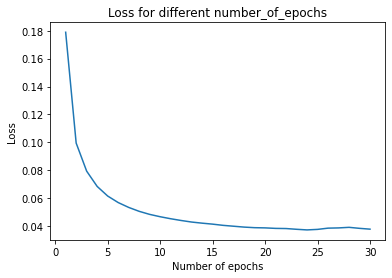

In [ ]:

plt.plot(epoch_num,loss_list)

plt.xlabel('Number of epochs')
plt.ylabel("Loss")
plt.title('Loss for different number_of_epochs')

Text(0.5, 1.0, 'Performance for different number_of_epochs')

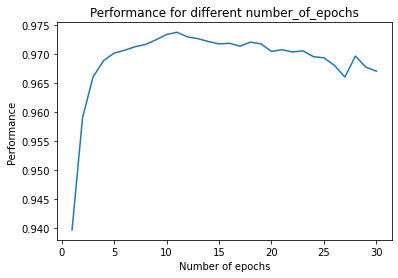

In [ ]:
# Plot performance vs number of epoch graph for best epochs number
plt.plot(epoch_num, performance)

plt.xlabel('Number of epochs')
plt.ylabel("Performance")
plt.title('Performance for different number_of_epochs')

**best parameter for number of epochs**= 6

**Training with best parameters**

In [ ]:
n = neuralNetwork(input_nodes,150,output_nodes, 0.05)

epochs= 10
predictions= []
performance= []
current_epoch=1
train_loss= 0
train_loss_list= []
test_loss = 0
test_loss_list= []

for e in range(epochs):
  # go through all records in the training data set
  for samples in range(60000):
    inputs= scaled_X_train[samples]
    targets= transformed_y_train[samples]
    train_loss += n.train(inputs, targets)
    pass
  for record in range(len(scaled_X_test)):
    # query the network 
    inputs= scaled_X_test[record]
    targets= transformed_y_test[record]
    outputs,new_loss = n.query(inputs, targets) 
    test_loss += new_loss
  train_loss_list.append(train_loss/60000)
  test_loss_list.append(test_loss/60000)
  train_loss= 0
  test_loss = 0
  evaluate_performance(scaled_X_test,transformed_y_test,current_epoch)
  current_epoch += 1
  pass

In [ ]:
epoch_number= list(range(1,11))

Text(0.5, 1.0, 'Train loss for different number_of_epochs')

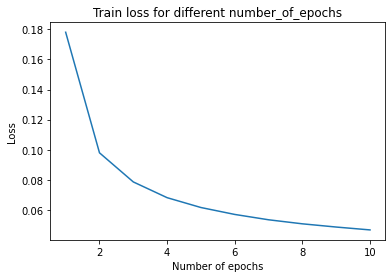

In [ ]:
# Train loss graph
plt.plot(epoch_number,train_loss_list)

plt.xlabel('Number of epochs')
plt.ylabel("Loss")
plt.title('Train loss for different number_of_epochs')

Text(0.5, 1.0, 'Test loss for different number_of_epochs')

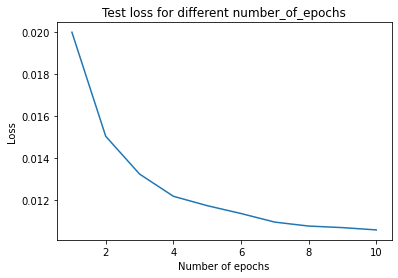

In [ ]:
# Test loss graph
plt.plot(epoch_number,test_loss_list)

plt.xlabel('Number of epochs')
plt.ylabel("Loss")
plt.title('Test loss for different number_of_epochs')

Text(0.5, 1.0, 'Performance for different number_of_epochs')

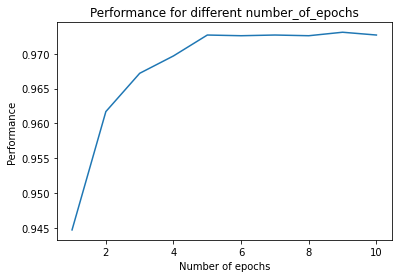

In [ ]:
#Performance graph
plt.plot(epoch_number, performance)

plt.xlabel('Number of epochs')
plt.ylabel("Performance")
plt.title('Performance for different number_of_epochs')

In [ ]:
# test the neural network 
predictions= []
# scorecard for how well the network performs, initially empty 
scorecard = [] 
# go through all the records in the test data set 
for record in range(len(scaled_X_test)):
  # query the network 
  outputs,loss = n.query(scaled_X_test[record],transformed_y_test[record]) 
  # the index of the highest value corresponds to the label 
  label = np.argmax(outputs) 
  predictions.append(label)
  print("networks answer:",label,"real answer:", np.argmax(transformed_y_test[record]),) 
  # append correct or incorrect to list 
  if (label == np.argmax(transformed_y_test[record])): 
    # network's answer matches correct answer, add 1 to scorecard 
    scorecard.append(1) 
  else: 
    # network's answer doesn't match correct answer, add 0 to scorecard 
    scorecard.append(0) 
    pass 
  pass

Görüntülenen çıkış son 5000 satıra kısaltıldı.
networks answer: 3 real answer: 3
networks answer: 9 real answer: 9
networks answer: 9 real answer: 9
networks answer: 8 real answer: 8
networks answer: 4 real answer: 4
networks answer: 1 real answer: 1
networks answer: 0 real answer: 0
networks answer: 6 real answer: 6
networks answer: 0 real answer: 0
networks answer: 9 real answer: 9
networks answer: 6 real answer: 6
networks answer: 8 real answer: 8
networks answer: 6 real answer: 6
networks answer: 1 real answer: 1
networks answer: 1 real answer: 1
networks answer: 9 real answer: 9
networks answer: 8 real answer: 8
networks answer: 9 real answer: 9
networks answer: 2 real answer: 2
networks answer: 3 real answer: 3
networks answer: 5 real answer: 5
networks answer: 5 real answer: 5
networks answer: 9 real answer: 9
networks answer: 4 real answer: 4
networks answer: 2 real answer: 2
networks answer: 1 real answer: 1
networks answer: 9 real answer: 9
networks answer: 4 real answer: 4
n

In [ ]:
# calculate the performance score, # calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9727


**Testing With Handwritten**

In [ ]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [ ]:
# our own image test data set
our_own_dataset = []

In [ ]:
def own_handwritten(image_file):
  img_array = imageio.imread(image_file, as_gray=True)
    
  # reshape from 28x28 to list of 784 values, invert values
  img_data  = 255.0 - img_array.reshape(784)
  
    
  # then scale data to range from 0.01 to 1.0print(img_data)
  img_data = (img_data / 255.0 * 0.99) + 0.01
  print(img_data)
  print("min = ", np.min(img_data))
  print("max = ", np.max(img_data))

  # plot image
  plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

  # query the network
  outputs, error = n.query(img_data,transformed_y_test[0])
  print (outputs)

  # the index of the highest value corresponds to the label
  label = np.argmax(outputs)
  print("network says ", label)

  record = np.append(label,img_data)
  our_own_dataset.append(record)

[0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.0294

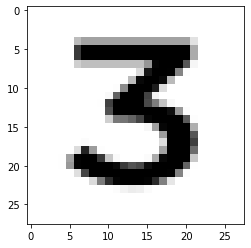

In [ ]:
own_handwritten('/content/drive/MyDrive/Handwritten_3-2.png')

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.04882353 0.25458825 0.31282353 0.27400002 0.01776471 0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01388235 0.02164706 0.16141178 0.8447059
 0.98835295 0.8641177  0.04494118 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.02941176 0.09541

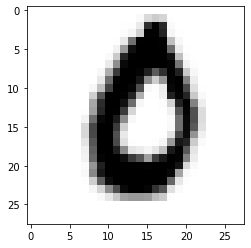

In [ ]:
own_handwritten('/content/drive/MyDrive/handwritten_0.png')

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

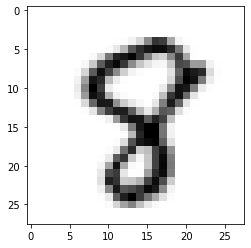

In [ ]:
own_handwritten('/content/drive/MyDrive/handwritten_8.png')

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.

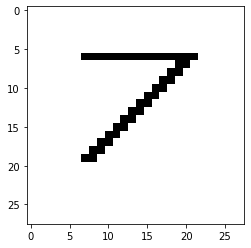

In [ ]:
own_handwritten('/content/drive/MyDrive/Handwritten_7.png')

Model predict our handwritten numbers correctly.

In [ ]:
print(confusion_matrix(np.argmax(transformed_y_test,1), predictions))
print(precision_score(np.argmax(transformed_y_test,1), predictions,  average="micro"))
print(recall_score(np.argmax(transformed_y_test,1), predictions, average="micro"))
print(f1_score(np.argmax(transformed_y_test,1), predictions,average="micro"))

[[ 970    0    0    2    1    2    0    1    4    0]
 [   0 1126    2    3    0    1    1    1    1    0]
 [   7    2 1005    5    2    0    0    6    4    1]
 [   2    0    5  988    0    3    0    5    4    3]
 [   1    0    2    0  952    0    5    0    2   20]
 [   8    1    0   10    1  858    6    2    3    3]
 [   7    3    2    2    2    8  930    0    4    0]
 [   1   11   12    2    3    0    0  983    4   12]
 [   4    4    3    7    3    5    1    4  940    3]
 [   2    4    1    8    9    1    2    5    2  975]]
0.9727
0.9727
0.9727
